# Project Description: Internship at Y.Afisha

*After managing to show brilliant performance during the Tripleten course. You were offered the opportunity to undergo an intership program in the **Y.Afisha's Analytics Departement**. On your first day, the **marketing department** give you a task to help them **optimize the marketing cost budget**.*

*In front of you are available data from January 2017 to December 2018 which consist of 3 files containing:*
- **Servers logs**/record of Y.Afisha site visit;
- **Order** data;
- Marketing **cost statistics**.

*By completing this task, they expect you to learn:*
- Y.Afisha user behaviour;
- Cohort analysis;
- Revenue generated;
- When all marketing costs pay off.

**Project Instructions**
1. ***Download data and prepare it for analysis***
    - Store visit, order, and expense data in variables.
    - Optimize the data you have for analysis purposes.
    - Make sure each of its columns is presented in the correct data type.
    - File path:
        - /datasets/visits_log_us.csv
        - /datasets/orders_log_us.csv
        - /datasets/costs_us.csv


2. ***Compile reports and calculate metrics:***
    
    - **Product**
        - How many people **use** the product **every day**, **week**, and **month**?
        - What is the number of **sessions per day**? (One user may have more than one session).
        - What is the **duration** for **each session**?
        - How often do **users return** to using the product?

    - **Sales**
        - **When** do people **start** making purchases?
            - **Additional Note**: In **KPI analysis**, we are usually interested in knowing the time that **elapses from** the time the **registration** is made until the **conversion** occurs or when an authorized user switches to a customer. For example, if the first registration and purchase occurred on the same day, that user could be included in the h0 Conversion category. If the first purchase occurs the next day, the category will also be h1 Conversions. You are welcome to use any approach that allows you to compare conversions from different cohorts, so you can determine which cohort or marketing channel is most effective.
        - How many **orders** do they make **over a period of time**?
        - What is the **average purchase size**?
        - How much money do they contribute? (**LTV**)

    - **Marketing**
        - How much **money is spent**? Overall/per source/over time
        - How much does **customer acquisition cost** (CAC) from each source?
        - How profitable is the investment? (**ROI**)

     *Create a **graph** that shows **how these metrics differ** for **different devices** and **ad sources**, as well as how they have **changed over time**.*


3. ***Writing down the conclusion:*** *tell marketing specialists how much money to invest and **where it should be invested**.*
   - What **sources/platforms** would you **recommend**?
   - Give reasons to support your choice:
       - What **metrics** do you focus on?
       - **Why**?
       - What **conclusions** do you make after finding the values of those metrics?


**Project Evaluation**

- *Your project will be **assessed against these criteria**. Read it carefully before you start the project.*
- *Here are the things that project reviewers will consider in assessing your project:*
    - How you **prepare** data for analysis;
    - What kind of **graph** you create **for each metric**;
    - How do you **interpret** the resulting **graph**;
    - How you **calculate** and **interpret each parameter**;
    - How you **support** your **recommendations** for marketing specialists and what **metrics** you use;
    - Do you follow the **project structure** and keep your code **tidy**;
    - Comments you make at every step;
    - **Conclusions** you made.

# Data dictionary

**The visits table (server logs with data on website access):**
- `Uid` — Unique user identifier
- `Device` — User's device
- `Start Ts` — Session start date and time
- `End Ts` — Session end date and time
- `Source Id` — The ID of the advertising source, the source with which the user comes to the website

**The orders table (order data):**
- `Uid` — Unique identifier of the user placing an order
- `Buy Ts` — Order date and time
- `Revenue` — Y.Afisha's revenue with order

**The costs table (data on marketing expenses):**
- `source_id` — Ad source identifier
- `dt` — Date
- `costs` — Expenses for this ad source on this day

## **Data Preparation**

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st

In [2]:
# data loading
df_costs = pd.read_csv('/datasets/costs_us.csv')
df_orders = pd.read_csv('/datasets/orders_log_us.csv')
df_visits = pd.read_csv('/datasets//datasets/visits_log_us.csv')

### Dataframe Visits

In [3]:
# general information
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
# metric information
df_visits.describe()

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [5]:
# dataframe size
df_visits.shape

(359400, 5)

In [6]:
# looking at the first rows of the df_orders dataframe
df_visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [7]:
# checking device type count
df_visits['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

*Let's break down the results. As we can see, the data we have is divided into five columns. To optimize this data, we have to convert datatype of object, which takes up a lot of memory, into a more concise datatype.*
- `Start Ts` and `End Ts` is a timestamp of session which can be converted into datetime64[ns]
- `Device` contain only two value, which means this column can be conveted into category

*In addition to updating the data type, the column names in the three files must also be changed to a consistent name.*

In [8]:
# checking column names
df_visits.columns

Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid'], dtype='object')

In [9]:
# putting column names in lower case
df_visits.columns = df_visits.columns.str.lower()
df_visits.columns

Index(['device', 'end ts', 'source id', 'start ts', 'uid'], dtype='object')

In [10]:
# renaming the columns 
df_renamed = df_visits.rename(columns={'end ts':'end_ts', 'start ts':'start_ts', 
                                       'source id':'source_id', 'uid': 'user_id'}, inplace=True)

In [11]:
# checking column names again
df_visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'user_id'], dtype='object')

In [12]:
# checking the format of the end_ts column
df_visits.end_ts.dtypes

dtype('O')

In [13]:
# checking the format of the start_ts column
df_visits.start_ts.dtypes

dtype('O')

In [14]:
# checking the format of the device column
df_visits.device.dtypes

dtype('O')

In [15]:
# changing the format of the end_ts column
df_visits['end_ts'] = pd.to_datetime(df_visits['end_ts'], format="%Y.%m.%d %H:%M")

In [16]:
# changing the format of the start_ts column
df_visits['start_ts'] = pd.to_datetime(df_visits['start_ts'], format="%Y.%m.%d %H:%M")

In [17]:
# changing the format of the device column
df_visits['device'] = df_visits['device'].astype('category')

In [18]:
# general information again
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   user_id    359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [19]:
# metric information again
df_visits.describe()

,source_id,user_id
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [20]:
# checking for unique values
df_visits['device'].unique()

['touch', 'desktop']
Categories (2, object): ['touch', 'desktop']

In [21]:
# checking for duplicate data
df_visits.duplicated().sum()

0

In [22]:
# checking for missing data
df_visits.isna().sum()

device       0
end_ts       0
source_id    0
start_ts     0
user_id      0
dtype: int64

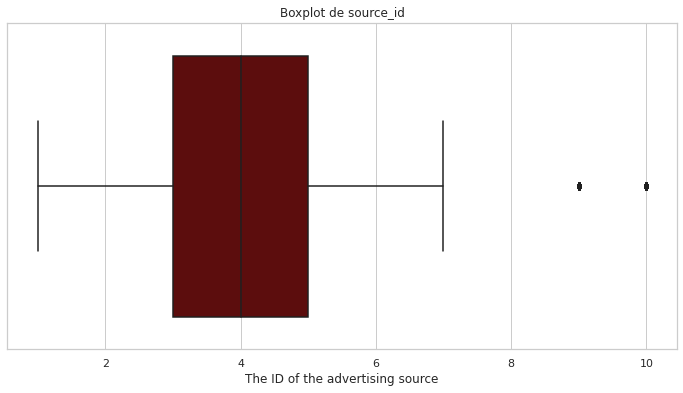

In [23]:
# boxplot
sns.set(style="whitegrid", palette="hot")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_visits, x='source_id')
plt.title('Boxplot de source_id')
plt.xlabel('The ID of the advertising source')
plt.show()

**Column Description**
- `device` — User's device
- `end_ts` — Session end date and time
- `source_id` — The ID of the advertising source, the source with which the user comes to the website
- `start_ts` — Session start date and time
- `user_id` — User ID

**Overview do dataframe df_visits:**
- *there are five columns `device`, `end_ts`, `source_id`, `start_ts` and `user_id`, all have 50415 rows*;
- *the `device` column is of type object, the `end_ts` column is of type object, the `source_id` column is of type int64, the `start_ts` column is of type object and the `user_id` column is of type uint64*;
- *column name changed from `end ts` to `end_ts`*;
- *column name changed from `start ts` to `start_ts`*;
- *column name changed from `source id` to `source_is`*;
- *column name changed from `uid` to `user_id`*
- *the data type of the `end_ts` and `start_ts` columns was changed from object to datetime*;
- *there is no big difference between the mean and median in the `source_id` column*;
- *there is no big difference between the mean and median in the `source_id` column*;
- *no duplicate data in the dataframe*;
- *no missing data in dataframe*;
- *there are no outliers in the `source_id` column*

### Dataframe Orders

In [24]:
# general information
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [25]:
# metric information
df_orders.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [26]:
# dataframe size
df_orders.shape

(50415, 3)

In [27]:
# looking at the first rows of the df_orders dataframe
df_orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [28]:
# checking column names
df_orders.columns

Index(['Buy Ts', 'Revenue', 'Uid'], dtype='object')

In [29]:
# putting column names in lower case
df_orders.columns = df_orders.columns.str.lower()
df_orders.columns

Index(['buy ts', 'revenue', 'uid'], dtype='object')

In [30]:
# renaming the buy ts column
df_renamed_2 = df_orders.rename(columns={'buy ts':'orders_ts', 'uid': 'user_id'}, inplace=True)

In [31]:
# checking column names again
df_orders.columns

Index(['orders_ts', 'revenue', 'user_id'], dtype='object')

In [32]:
# checking the format
df_orders.orders_ts.dtypes

dtype('O')

In [33]:
# changing the format
df_orders['orders_ts'] = pd.to_datetime(df_orders['orders_ts'], format="%Y.%m.%d %H:%M")

In [34]:
# general information again
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   orders_ts  50415 non-null  datetime64[ns]
 1   revenue    50415 non-null  float64       
 2   user_id    50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [35]:
# metric information again
df_orders.describe()

,revenue,user_id
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [36]:
# checking for duplicate data
df_orders.duplicated().sum()

0

In [37]:
# checking for missing data
df_orders.isna().sum()

orders_ts    0
revenue      0
user_id      0
dtype: int64

**Column Description**
- `orders_ts` — Order date and time
- `revenue` — Revenue generated per order
- `user_id` — User ID

**Overview do dataframe df_orders:**

- *there are three columns `user_id`, `revenue` and `orders_ts`, all have 50415 rows*;
- *the `user_id` column is of type uint64, the `revenue` column is of type float64 and the `orders_ts` column is of type object*;
- *column name changed from `buy ts` to `orders_ts`*;
- column name changed from `uid` to `user_id`
- *the data type of the `orders_ts` column was changed from object to datetime*;
- *the average is almost doble the median in the `revenue` column*;
- *there is no big difference between the mean and median in the `user_id` column*;
- *no duplicate data in the dataframe*;
- *no missing data in the dataframe*;

### Dataframe Costs

In [38]:
# general information
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [39]:
# metric information
df_costs.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [40]:
# dataframe size
df_costs.shape

(2542, 3)

In [41]:
# looking at the first rows of the df_costs dataframe
df_costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [42]:
# checking column names
df_costs.columns

Index(['source_id', 'dt', 'costs'], dtype='object')

In [43]:
# renaming the dt column
df_renamed = df_costs.rename(columns={'dt':'date'}, inplace=True)

In [44]:
# checking column names again
df_costs.columns

Index(['source_id', 'date', 'costs'], dtype='object')

In [45]:
# checking the format
df_costs.date.dtypes

dtype('O')

In [46]:
# changing the format
df_costs['date'] = pd.to_datetime(df_costs['date'])

In [47]:
# general information again
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   date       2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [48]:
# metric information again
df_costs.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [49]:
# checking for duplicate data
df_costs.duplicated().sum()

0

In [50]:
# checking for missing data
df_costs.isna().sum()

source_id    0
date         0
costs        0
dtype: int64

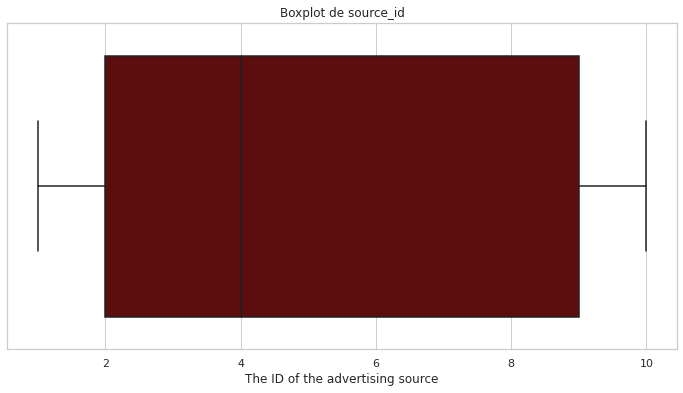

In [51]:
# boxplot
sns.set(style="whitegrid", palette="hot")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_costs, x='source_id')
plt.title('Boxplot de source_id')
plt.xlabel('The ID of the advertising source')
plt.show()

**Column Description**
- `source_id` — The ID of the advertising source
- `date` — Date
- `costs` — Costs incurred by the marketing division per ad source per day

**Overview do dataframe df_costs:**

- *there are three columns `source_id`, `dt` and `costs`, all have 2542 rows*;
- *the `source_id` column is of type int64, the `dt` column is of type object and the `costs` column is of type float64*;
- *column name changed from `dt` to `date`*;
- *the data type of the `date` column was changed from object to datetime*;
- *there is no big difference between the mean and median in the `source_id` column*;
- *there is a big difference between the mean and median in the `costs` column, but with relevant standard deviation*;
- *no duplicate data in the dataframe*;
- *no missing data in the dataframe*;
- *there are no outliers in the source_id column*

## **Data Analysis**

*After the data has been loaded and optimized, we can start performing the analysis based on the assigned task. This project divides the analysis process into 3 topics:*
- Product Analysis
- Sales Analysis
- Marketing Analysis

### **Product Analysis**

*By conducting product analysis, you were expected to answer these following questions:*
- How many people **use** the product **every day**, **week**, and **month**?
- What is the number of **sessions per day**? (One user may have more than one session).
- What is the **duration** for **each session**?
- How often do **users return** to using the product?

*Daily, weekly, and monthly active user*

*To answer the first question, we have to obtain the main metrics that can describe the number of active users*
- **DAU** — number of daily active users (unique)
- **WAU** — number of weekly active users
- **MAU** — number of monthly active users

*We have the user ID, the source of the user's origin, as well as a timestamp that contains session start and session end data. To calculate weekly and monthly activity, we must first create separate columns for the year, month, and week values.*

In [52]:
df_visits['year'] = df_visits['start_ts'].dt.year
df_visits['month'] = df_visits['start_ts'].dt.month
df_visits['week'] = df_visits['start_ts'].dt.isocalendar().week
df_visits['date'] = df_visits['start_ts'].dt.date

df_visits.head()

,device,end_ts,source_id,start_ts,user_id,year,month,week,date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


**Column Description**
- `device` — User's device
- `end_ts` — Session end date and time
- `source_id` — The ID of the advertising source, the source with which the user comes to the website
- `start_ts` — Session start date and time
- `user_id` — User ID
- `year` — The year of session start
- `month` — The month of session start
- `week` — The ISO week date of session start
- `date` — the date of session start in the format of %Y-%m-%d

*Now, let's calculate the metric. We'll group the existing data by the date/week/month of the session and look for the average values:*

In [53]:
dau = (df_visits.groupby('date').agg({'user_id':'nunique'}).mean())

wau = (df_visits.groupby('week').agg({'user_id':'nunique'}).mean())

mau = (df_visits.groupby('month').agg({'user_id':'nunique'}).mean())

print('Average daily user:', int(dau), 'People')
print('Average weekly user:', int(wau), 'People')
print('Average monthly user:', int(mau), 'People')

Average daily user: 907 People
Average weekly user: 5825 People
Average monthly user: 23228 People


*There we go, we have answered the first question of product analysis.*
- Average daily user: 907 People
- Average weekly user: 5,825 People
- Average monthly user: 23,228 People

#### Session per Day

*To answer the second question, we will need a metric of **Session per Day**. Calculating this metric is relatively easy. We just need to count the session of each day and obtain the average value.*


In [54]:
avg_session_per_day = (df_visits.groupby('date').agg({'user_id':'count'}).mean())

print('Average session per day:', int(avg_session_per_day), 'Session')

Average session per day: 987 Session


*There we go, now we know that in average, Y.Afisha was visited 987 times each day. Please note that the same person can open the website 2 or more times per day.*

*For even more interesting insights, we can calculate the Session per User metric. We just need to divide the number of sessions by the number of users for a given period, Let's say that we want to know the numbe of session per user for each month.*

In [55]:
avg_session_per_month = (df_visits.groupby('month').agg({'user_id':'count'}).mean())

avg_n_users_per_month = (df_visits.groupby('month').agg({'user_id':'nunique'}).mean())

average_session_per_user = avg_session_per_month / avg_n_users_per_month

print('On average, it turns out that each user spends at most', int(average_session_per_user), 'Session per month')

On average, it turns out that each user spends at most 1 Session per month


*On average, it turns out that each user spends at most 1 session per month visiting the website. Thus, we cannot mention that this website is used regularly.*

#### Average Session Length

*Average session length or ASL is the amount of time a user spends while using the product in an average session. Whether or not an ASL is "good" depends on the nature of your product.*

*Let's find the ASL by calculating the length of the entire session duration and finding the average:*

In [56]:
df_visits['duration'] = (df_visits['end_ts'] - df_visits['start_ts']).dt.seconds
print('Average session length:', (df_visits['duration'].mean()/60).round(2),'minutes')

Average session length: 10.73 minutes


*In average, the session length of Y.Afisha visitors are approximately at 10 minutes. This value is makes sense because each user will require time to surf the contents of the Y.Afisha website before finally terminating the session.*

*Let's dive deeper and look into the session length distribution:*

Mode of session length: 60 seconds


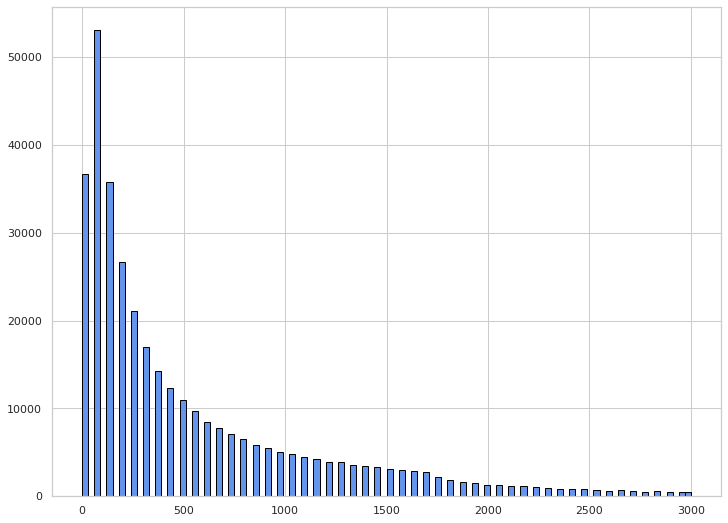

In [57]:
df_visits['duration'].hist(bins=100, range=(0,3000), figsize=(12, 9), color = "cornflowerblue", edgecolor='black')

print('Mode of session length:', int(df_visits['duration'].mode()), 'seconds')

*It turns out that our session length distribution is not normal. In this case, we need to use the mode instead of average or median.*

*Therefore, the mode of session length of Y.Afisha visits is 60 seconds.*

#### Sticky Factor

*To answer the last question, we can use the **Sticky Factor** metric. This metric shows the level of audience loyalty—how often users return to your website. The formula is quite simple, we just need the ratio of daily average user to the weekly/monthly average user.*

In [58]:
sticky_wau = (dau / wau) * 100
sticky_mau = (dau / mau) * 100

print('Weekly sticky factor:',"%.2f" % sticky_wau, '%')
print('Monthly sticky factor:',"%.2f" % sticky_mau, '%')

Weekly sticky factor: 15.59 %
Monthly sticky factor: 3.91 %


*It turns out that Y.Afisha have low level of sticky factor. The marketing teams will need to find a way to increase this.*

**Intermediate Conclusions**

*On **product analysis**, we answer the question asked by calculating these following metrics.*
- **Active User**
    - Daily: 907 users
    - Weekly: 5,825 users
    - Monthly: 23,228 users
- **Session per Day**: 987 sessions
- **Session Length**:
    - Average: 10 minutes
    - Mode: 60 seconds
- **Sticky Factor**:
    - Weekly: 15.59%
    - Monthly: 3.91%

### **Sales Analysis**

*By conducting product analysis, you were expected to answer these following questions:*
- **When** do people **start** making purchases?
- How many **orders** do they make **over a period of time**?
- What is the **average purchase size**?
- How much money do they contribute? (**LTV**)

#### Lead time

*To answer the first question, we need to calculate the **lead time** metric. A lead time is the latency between the initiation and completion of a process. Or in this scenario, a latency between the first time a user visit the Y.Afisha website and the first time user complete an order.*

*We have the order time stamp, the revenue, as well as a the user ID. To calculate lead time, we must first create separate columns for the time stamp of the first order and the first session of each user.*

In [59]:
first_order_ts = df_orders.groupby('user_id')['orders_ts'].min()
first_session_ts = df_visits.groupby('user_id')['start_ts'].min()

first_order_ts.name = 'first_order_ts'
first_session_ts.name = 'first_session_ts'

df_orders = df_orders.join(first_order_ts, on='user_id')
df_orders = df_orders.join(first_session_ts, on='user_id')

df_orders['lead_time'] = ((df_orders['first_order_ts'] - df_orders['first_session_ts']).dt.seconds)/(60)

df_orders.head()

,orders_ts,revenue,user_id,first_order_ts,first_session_ts,lead_time
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,1.0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,11.0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2.0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,15.0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,27.0


**Column Description**
- `orders_ts` — Order date and time
- `revenue` — Revenue generated per order
- `user_id` — User ID
- `first_order_ts` — First order date and time
- `first_session_ts` — First session start date and time
- `lead_time` — Latency between the first visit and the first order in minutes

Median time taken before user decide to order: 20 minutes
Average time taken before user decide to order: 284 minutes
Maximum time taken before user decide to order: 24 hours


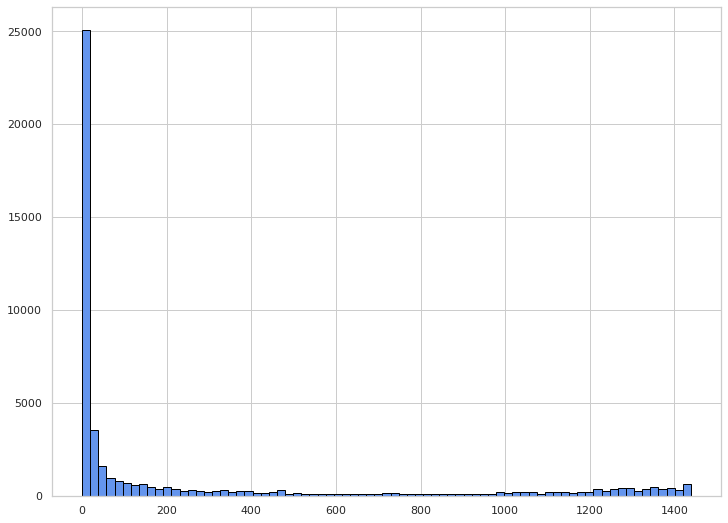

In [60]:
df_orders['lead_time'].hist(bins=75, figsize=(12, 9), color = "cornflowerblue", edgecolor='black')

print('Median time taken before user decide to order:',int(df_orders['lead_time'].median()), 'minutes')
print('Average time taken before user decide to order:',int(df_orders['lead_time'].mean()), 'minutes')
print('Maximum time taken before user decide to order:', int((df_orders['lead_time'].max()/60).round()), 'hours')


#### Cohort Analysis

*To answer the second question, we need to conduct a cohort analysis and create a heatmap visualization as the output.*

*All the data needed for cohort analysis is ready: knowing the date of the order allows us to take the earliest date. Then, after grouping users by their first purchase date, we can create a cohort.*

*All the data needed for cohort analysis is ready: We already have the data of first order and the order time stamp. The next step is to separate the month from the dates in the and columns. Let's call the method and change the values of both columns to type. In type, is the timestamp range—in this case the range is months.*

*Next, let's look at the cohort's life cycle. We will subtract the cohort month from the month in which the purchase was made.*

In [61]:
df_orders['first_order_month'] = df_orders['first_order_ts'].astype('datetime64[M]')
df_orders['order_month'] = df_orders['orders_ts'].astype('datetime64[M]')

df_orders['cohort_lifetime'] = (df_orders['order_month'] - df_orders['first_order_month']) / np.timedelta64(1, 'M')
df_orders['cohort_lifetime'] = df_orders['cohort_lifetime'].round().astype('int')

df_orders['first_order_month'] = df_orders['first_order_month'].dt.strftime('%Y-%m') 

df_orders.head()

,orders_ts,revenue,user_id,first_order_ts,first_session_ts,lead_time,first_order_month,order_month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,1.0,2017-06,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,11.0,2017-06,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2.0,2017-06,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,15.0,2017-06,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,27.0,2017-06,2017-06-01,0


**Column Description**
- `orders_ts` — Order date and time
- `revenue` — Revenue generated per order
- `user_id` — User ID
- `first_order_ts` — First order date and time
- `first_session_ts` — First session start date and time
- `lead_time` — Latency between the first visit and the first order in minutes
- `first_order_month` — cohort month
- `order_mont` — Order month
- `cohort_lifetime` — the number of months of purchase relative to the cohort month.

*Now we'll build a pivot table that shows the change in count of order. Its columns will contain the lifecycle and the rows will contain cohorts*

In [62]:
order_pivot = df_orders.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='user_id',
    aggfunc='count',
)

order_pivot.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,2354.0,177.0,174.0,226.0,292.0,218.0,276.0,174.0,212.0,153.0,96.0,86.0
2017-07,2186.0,100.0,120.0,104.0,72.0,82.0,61.0,50.0,58.0,24.0,53.0,
2017-08,1533.0,108.0,100.0,81.0,85.0,62.0,49.0,78.0,46.0,46.0,,
2017-09,2933.0,219.0,161.0,164.0,67.0,109.0,108.0,56.0,61.0,,,
2017-10,4964.0,314.0,162.0,122.0,129.0,103.0,86.0,125.0,,,,
2017-11,4813.0,397.0,182.0,211.0,136.0,59.0,102.0,,,,,
2017-12,5052.0,270.0,202.0,179.0,86.0,105.0,,,,,,
2018-01,3783.0,224.0,159.0,64.0,78.0,,,,,,,
2018-02,4095.0,222.0,83.0,70.0,,,,,,,,


*Unfortunately, it is difficult to draw conclusions from such tables: the values look blurred and identical to each other. No value is really capable of attracting attention. However, if we add color and modify the table into a heatmap, the trends and patterns will become clearer.*

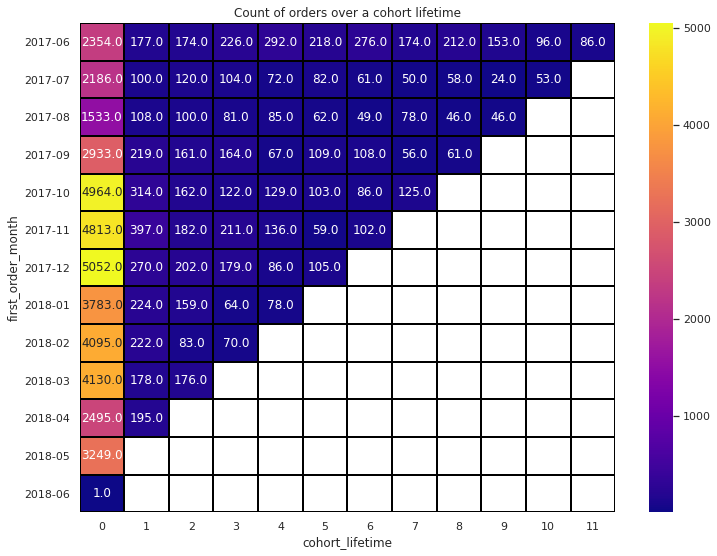

In [85]:
plt.figure(figsize=(12, 9))
plt.title('Count of orders over a cohort lifetime')
df_order_heatmap = sns.heatmap(
    order_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='black',
    cmap='icefire')

*The first 6 cohort generally experience an increase until peaked on December 2017. Eventually, the orders experience a natural drops as older cohorts have more time to place orders.*

*We can also draw another conclusion: the number of users in each cohort life time decreases drastically from month to month. This indicates that the number of customers making second or more purchases is getting less and less.*

#### Average Purchase Size

*Average Purchase Value refers to the average dollar amount spent on your services for each customer. This metric can either be calculated based on the overall value of the contract or it's annual, quarterly, monthly, or weekly value. In this scenario, we will calculate purchase size for each cohort and cohort life time.*

In [64]:
orders_grouped_by_cohorts = df_orders.groupby(['first_order_month', 'cohort_lifetime']).agg({'revenue': 'sum', 'user_id': 'nunique'})

orders_grouped_by_cohorts['revenue_per_user'] = (orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['user_id']) 

orders_grouped_by_cohorts.columns = ['sum_revenue', 'n_users', 'revenue_per_user']

orders_grouped_by_cohorts

sum_revenue  n_users  revenue_per_user
first_order_month cohort_lifetime                                        
2017-06           0                    9557.49     2023          4.724414
                  1                     981.82       61         16.095410
                  2                     885.34       50         17.706800
                  3                    1931.30       54         35.764815
                  4                    2068.58       88         23.506591
...                                        ...      ...               ...
2018-03           2                    1114.87       58         19.221897
2018-04           0                   10600.69     2276          4.657597
                  1                    1209.92       69         17.535072
2018-05           0                   13925.76     2988          4.660562
2018-06           0                       3.42        1          3.420000

[79 rows x 3 columns]

*Now we'll build a pivot table that shows the change in revenue per order average. Its columns will contain the lifecycle and the rows will contain cohorts*

In [65]:
revenue_pivot = orders_grouped_by_cohorts.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='revenue_per_user',
    aggfunc='mean') 

revenue_pivot.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.724414,16.09541,17.7068,35.764815,23.506591,22.207761,31.011935,25.033191,19.29569,27.233556,25.681333,9.804151
2017-07,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,
2017-08,5.276518,11.148793,11.851321,12.182955,16.92125,12.139063,9.620333,12.610455,21.07,8.307419,,
2017-09,5.644529,22.188385,13.4452,138.669189,19.881538,26.095,27.437121,16.961351,11.044651,,,
2017-10,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,,,,
2017-11,5.154683,7.339054,6.786583,12.51066,7.457284,4.580833,7.564839,,,,,
2017-12,4.738191,7.816575,39.366019,48.135052,27.4314,23.518413,,,,,,
2018-01,4.135636,8.721228,12.365542,11.199767,4.699556,,,,,,,
2018-02,4.156987,8.61,4.942414,6.941026,,,,,,,,


*Then, we will visualize the pivoted data into a heatmap.*

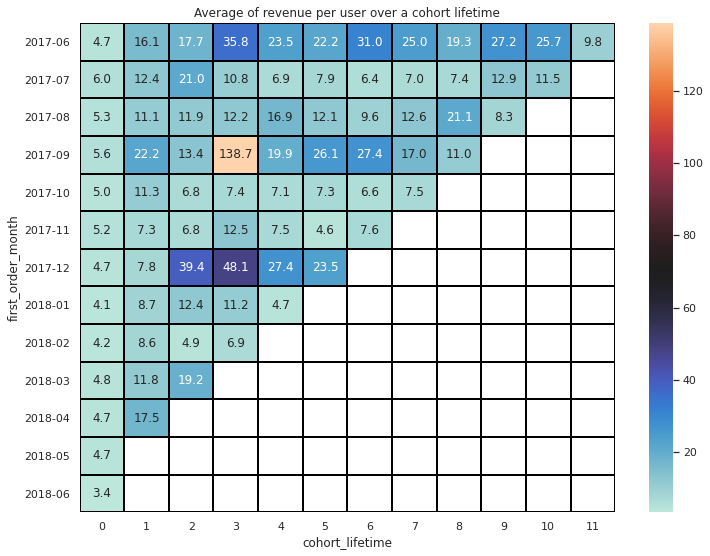

In [66]:
plt.figure(figsize=(12, 9))
plt.title('Average of revenue per user over a cohort lifetime')
revenue_heatmap = sns.heatmap(
    revenue_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='black',
    cmap='icefire')

#### Lifetime Value

*Lifetime Value (LTV) is the value of the "lifecycle" of a customer. This value is the total amount of money that a customer gives to the company on average by making a purchase. When calculating LTV, analysts usually take into account the gross profit of a customer per period.*

*Let's revisit what we need to do:*
    
    1. Search for the first purchase date of each customer
    2. Calculates the number of new subscribers for each date (or date range — in this case, for each month)
    3. Add the month the first order was placed into the "orders" table
    4. Group tables and calculate revenue

*The data period we have covers almost a year. Therefore, it will be easier if we create a monthly cohort. We calculate the number of new buyers for each month*

In [67]:
# calculate the number of new subscribers () for each month
cohort_sizes = df_orders.groupby('first_order_month').agg({'user_id': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340


*Now is the time for us to create a cohort. We'll group the "orders" table by month of first purchase and month of purchase / cohort lifetime. Then, we add up the income. We reset the index to its original state.*

In [68]:
# group the "orders" table by month of first purchase and month of purchase. add up the income. 
cohorts = df_orders.groupby(['first_order_month','cohort_lifetime', 'order_month']).agg({'revenue': 'sum'}).reset_index()

cohorts.head()

,first_order_month,cohort_lifetime,order_month,revenue
0,2017-06,0,2017-06-01,9557.49
1,2017-06,1,2017-07-01,981.82
2,2017-06,2,2017-08-01,885.34
3,2017-06,3,2017-09-01,1931.30
4,2017-06,4,2017-10-01,2068.58


*In a cohort analysis, LTV is the cumulative income of a cohort that takes into account the number of people in the cohort. Let's add data related to the number of users who made their first purchase in each month to the table*

In [69]:
# add data related to the number of users who made their first purchase in each month to the table
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

report.head()

,first_order_month,n_buyers,cohort_lifetime,order_month,revenue
0,2017-06,2023,0,2017-06-01,9557.49
1,2017-06,2023,1,2017-07-01,981.82
2,2017-06,2023,2,2017-08-01,885.34
3,2017-06,2023,3,2017-09-01,1931.30
4,2017-06,2023,4,2017-10-01,2068.58


*Succeed! A column that contains new customer data has been added to the table as. The first five values in n_buyers column are indeed the same, because they all relate to the same cohort.*

*With just two more steps and we will get the LTV value. Let's divide the profit of the cohort for each month by the total number of users in each cohort.*

In [70]:
# calculate LTV and CAC
report['ltv'] =  report['revenue'] / report['n_buyers']

report.head()

,first_order_month,n_buyers,cohort_lifetime,order_month,revenue,ltv
0,2017-06,2023,0,2017-06-01,9557.49,4.724414
1,2017-06,2023,1,2017-07-01,981.82,0.485329
2,2017-06,2023,2,2017-08-01,885.34,0.437637
3,2017-06,2023,3,2017-09-01,1931.30,0.954671
4,2017-06,2023,4,2017-10-01,2068.58,1.022531


*To make the result easier to read, we'll visualize the cohort in the form of a pivot table and heatmap.*

In [71]:
ltv_pivot = report.pivot_table(
    index='first_order_month', 
    columns='cohort_lifetime', 
    values='ltv', 
    aggfunc='mean').round(2)

ltv_pivot.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,
2017-08,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,,
2017-09,5.64,1.12,0.52,3.98,0.4,0.65,0.7,0.24,0.18,,,
2017-10,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,,,,
2017-11,5.15,0.4,0.2,0.32,0.15,0.05,0.11,,,,,
2017-12,4.74,0.26,0.93,1.07,0.31,0.34,,,,,,
2018-01,4.14,0.29,0.3,0.14,0.06,,,,,,,
2018-02,4.16,0.28,0.08,0.07,,,,,,,,


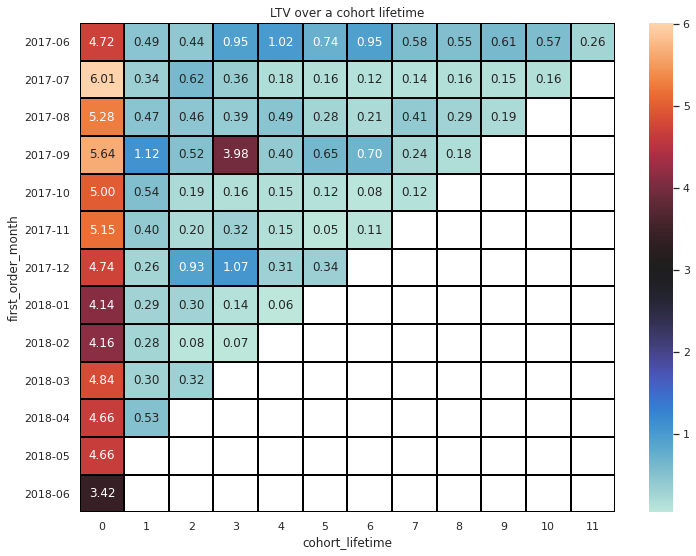

In [72]:
plt.figure(figsize=(12, 9))
plt.title('LTV over a cohort lifetime')
order_heatmap = sns.heatmap(
    ltv_pivot,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
    cmap='icefire') 

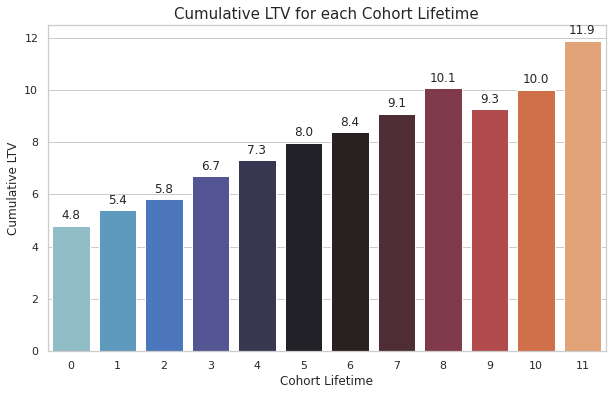

In [73]:
cum_ltv = ltv_pivot.cumsum(axis=1).mean(axis=0).reset_index()
cum_ltv.columns = ['cohort_lifetime', 'cumulative_LTV']

plt.figure(figsize=(10,6))
a = sns.barplot(data=cum_ltv, x='cohort_lifetime', y='cumulative_LTV', palette='icefire')

for g in a.patches:
    a.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), rotation=0, 
                   textcoords = 'offset points')
plt.title('Cumulative LTV for each Cohort Lifetime',fontsize=15)
plt.xlabel('Cohort Lifetime')
plt.ylabel('Cumulative LTV')
plt.show()

*Each cohort starts with almost similar average income per buyer with each following month experience decrease. Nevertheless, the cumulative LTV shows that there is a consistent pattern of increase through the cohort lifetime.*

*One of the interesting things that we noticed, there was a leap in LTV for the 2017-09 cohort in month four.*

**Intermediate Conclusions**

On **sales analysis**, we answer the question asked by calculating these following metrics.

- **Lead time** - Time taken from the first session start to a final decision to purchase product
    - Average: 4 hours and 44 minutes
    - Median: 20 minutes
    - Max: 24 hours
- **Cohort Analysis**
    - Order count: The significant drop after the first month for each cohort show a majority of users are not making repeat purchases.
    - Average revenue per user: This analysis shows that the buyer who decided to make a repeat purchase, order in higher volume then their first order.
    - Lifetime Value: Each cohort starts with almost similar LTV, experience drop in average revenue per buyer the following month and cumulatively continues to increase in value.

### **Marketing Analysis**

*By conducting marketing analysis, you were expected to answer these following questions:*
- How much **money is spent**? Overall/per source/over time
- How much does **customer acquisition cost** (CAC) from each source?
- How profitable is the investment? (**ROI**)

#### Expense Statistics

In [74]:
print('In overall, the marketing department have spent','${:8,.2f}'.format(df_costs['costs'].sum()))

In overall, the marketing department have spent $329,131.62


In [75]:
expense_per_source = df_costs.groupby('source_id').agg({'costs':'sum'}).reset_index()
expense_per_source['percentage'] = expense_per_source['costs'] / (df_costs['costs'].sum()) * 100

expense_per_source

,source_id,costs,percentage
0,1,20833.27,6.329769
1,2,42806.04,13.005751
2,3,141321.63,42.937725
3,4,61073.60,18.555981
4,5,51757.10,15.725350
5,9,5517.49,1.676378
6,10,5822.49,1.769046


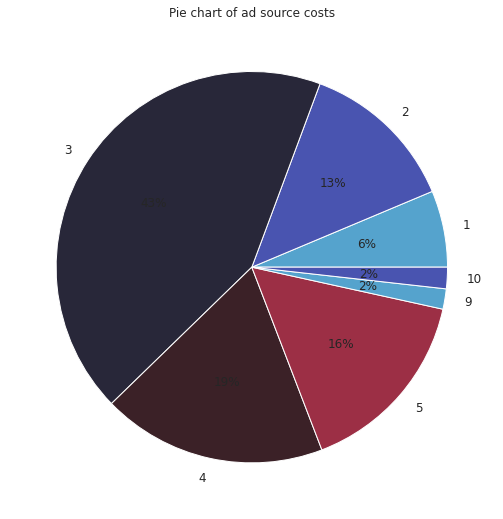

In [76]:
colors = sns.color_palette('icefire')[0:5]
data = expense_per_source['percentage']
labels = expense_per_source['source_id']

#create pie chart
plt.figure(figsize=(12, 9))
plt.title('Pie chart of ad source costs')
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', textprops={'fontsize': 12})
plt.show()

*In total, marketing department have spent more than $300.000 where 43\% of it was used for ad source 3*

In [77]:
df_costs['month'] = df_costs['date'].astype('datetime64[M]')

expense_per_month = df_costs.groupby('month').agg({'costs':'sum'}).reset_index()
expense_per_month['percentage'] = (expense_per_month['costs'] / (df_costs['costs'].sum())) * 100

expense_per_month['month'] = expense_per_month['month'].dt.strftime('%Y-%m')


expense_per_month

,month,costs,percentage
0,2017-06,18015.00,5.473494
1,2017-07,18240.59,5.542035
2,2017-08,14790.54,4.493807
3,2017-09,24368.91,7.404001
4,2017-10,36322.88,11.035974
5,2017-11,37907.88,11.517544
6,2017-12,38315.35,11.641346
7,2018-01,33518.52,10.183926
8,2018-02,32723.03,9.942232
9,2018-03,30415.27,9.241066


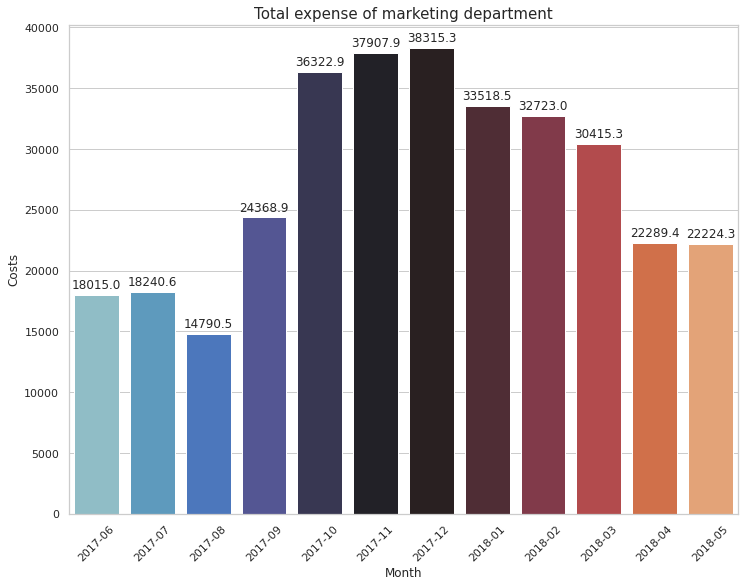

In [78]:
plt.figure(figsize=(12, 9))
a = sns.barplot(data=expense_per_month, x='month', y='costs', palette='icefire')

for g in a.patches:
    a.annotate(format(g.get_height(), '.1f'), 
               (g.get_x() + g.get_width() / 2., g.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 10), rotation=0, 
               textcoords = 'offset points')

plt.title('Total expense of marketing department',fontsize=15)
plt.xlabel('Month')
plt.ylabel('Costs')
plt.xticks(rotation=45)
plt.show()

*Marketing spending increases at the end of the year 2017 and decreases towards the beginning of the year 2018.*

#### Custome Acquisition Cost

*Customer Acquisition Cost (CAC) is the cost spent on attracting a customer—the money a company spends on new customers. In this scenario, we first have to obtain the number of customer from visits data.*

In [79]:
source_sizes = df_visits.groupby('source_id').agg({'user_id': 'nunique'}).reset_index()
source_sizes.columns = ['source_id', 'n_visitors']

source_sizes

,source_id,n_visitors
0,1,18999
1,2,26245
2,3,74756
3,4,83525
4,5,56974
5,6,6
6,7,34
7,9,9264
8,10,8067


*Then, we calculate the CAC by dividing the costs of each ad source by its visitor.*

In [80]:
cac_report = source_sizes.join(expense_per_source['costs'], how='left', on = 'source_id')
cac_report['cac'] = cac_report['costs'] / cac_report['n_visitors']

cac_report

,source_id,n_visitors,costs,cac
0,1,18999,42806.04,2.253068
1,2,26245,141321.63,5.384707
2,3,74756,61073.60,0.816973
3,4,83525,51757.10,0.619660
4,5,56974,5517.49,0.096842
5,6,6,5822.49,970.415000
6,7,34,NaN,NaN
7,9,9264,NaN,NaN
8,10,8067,NaN,NaN


*From this data, we eventually discovered that ad source 6 was ineffective. We should also raise our budget and efforts to attract customers through ad source 5.*

#### Return of Marketing Investment

*Let's do the calculations for the other cohorts and determine the number of months each cohort needs to cover marketing costs. To find out, we will calculate the CAC for each cohort. In previous section, we have calculate the total expenses for each month. Then, we divide the total expenditure by the number of customers in each cohort:*

In [81]:
report = pd.merge(report, expense_per_month[['month', 'costs']], left_on='first_order_month', right_on='month')
report['cac'] = report['costs'] / report['n_buyers']

report.head()

,first_order_month,n_buyers,cohort_lifetime,order_month,revenue,ltv,month,costs,cac
0,2017-06,2023,0,2017-06-01,9557.49,4.724414,2017-06,18015.0,8.905091
1,2017-06,2023,1,2017-07-01,981.82,0.485329,2017-06,18015.0,8.905091
2,2017-06,2023,2,2017-08-01,885.34,0.437637,2017-06,18015.0,8.905091
3,2017-06,2023,3,2017-09-01,1931.30,0.954671,2017-06,18015.0,8.905091
4,2017-06,2023,4,2017-10-01,2068.58,1.022531,2017-06,18015.0,8.905091


*Next, let's find ROMI (return on marketing investment) by dividing LTV by CAC. To calculate the cumulative ROMI, we need to call a method of cumulative sum.*

In [82]:
report['romi'] = report['ltv'] / report['cac']

romi_pivot = report.pivot_table(
    index='first_order_month', 
    columns='cohort_lifetime', 
    values='romi', 
    aggfunc='mean')

cum_romi_pivot = romi_pivot.cumsum(axis=1).round(2)
cum_romi_pivot.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,
2017-08,0.49,0.53,0.57,0.61,0.66,0.68,0.7,0.74,0.77,0.78,,
2017-09,0.60,0.72,0.77,1.19,1.23,1.3,1.38,1.4,1.42,,,
2017-10,0.60,0.66,0.68,0.7,0.72,0.74,0.75,0.76,,,,
2017-11,0.55,0.6,0.62,0.65,0.67,0.68,0.69,,,,,
2017-12,0.54,0.57,0.68,0.8,0.84,0.87,,,,,,
2018-01,0.42,0.45,0.48,0.49,0.5,,,,,,,
2018-02,0.46,0.49,0.5,0.51,,,,,,,,


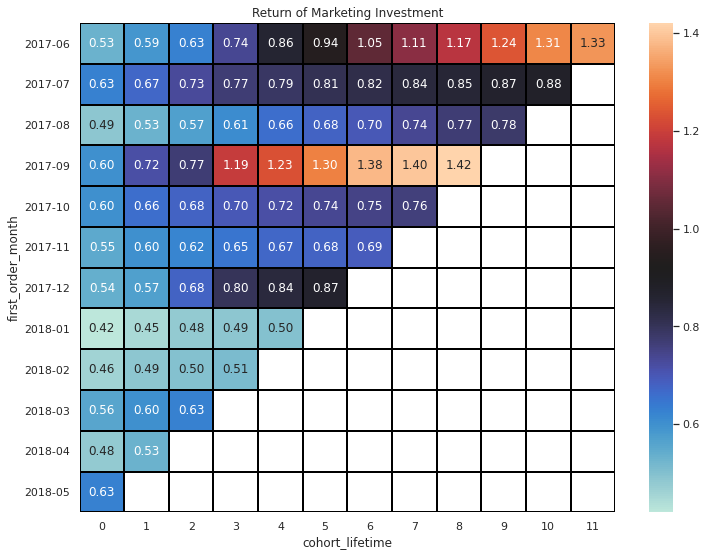

In [83]:
plt.figure(figsize=(12, 9))
plt.title('Return of Marketing Investment')
romi_heatmap = sns.heatmap(
    cum_romi_pivot,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
    cmap='icefire')

*Let's read the report:*
- The June 2017 cohort successfully covered marketing costs in the 7th month (ROMI = 1.05).
- The September 2017 cohort even did better by succesfully covered marketing costs in the 4th month (ROMI = 1.19). 
- This was due to an explosion in sales from that cohort in the 4th month
- While other cohort have not succesfully covered marketing costs

*Let's calculate how quickly a cohort manages to cover marketing costs on average. We'll calculate the average of the values in each column*

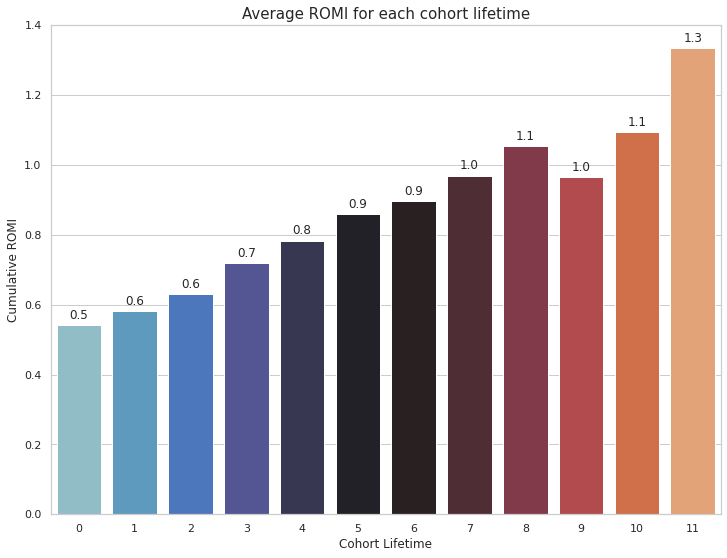

In [84]:
cum_romi = romi_pivot.cumsum(axis=1).mean(axis=0).reset_index()
cum_romi.columns = ['cohort_lifetime', 'cum_romi']

plt.figure(figsize=(12, 9))
c = sns.barplot(data=cum_romi, x='cohort_lifetime', y='cum_romi', palette='icefire')

for g in c.patches:
    c.annotate(format(g.get_height(), '.1f'), 
               (g.get_x() + g.get_width() / 2., g.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 10), rotation=0, 
               textcoords = 'offset points')

plt.title('Average ROMI for each cohort lifetime',fontsize=15)
plt.xlabel('Cohort Lifetime')
plt.ylabel('Cumulative ROMI')
plt.show()

*On average, cohorts usually only manage to cover marketing costs towards the end of the 7th month. However, why does the business still record losses even though its cohorts provide positive results? This happened because the company's faster growth only began to be observed in the end of the year. As spending increases, so does the number of new customers. It can take up to seven months to break even. Therefore, the profit obtained still cannot cover expenses. In conclusion, this business is still relatively healthy.*

## **Final Conclusions**

**Overview do dataframe df_visits:**

- *The dataframe contains five columns `device`, `end_ts`, `source_id`, `start_ts` and `user_id` with 50415 rows each and each of type object, int64, object, or uint64. A few of the column names have been changed, and the data type of the `end_ts` and `start_ts` columns has been changed from object to datetime. The dataframe shows no significant difference between mean and median, and no duplicate or missing data.*

**Overview do dataframe df_orders:**

- *The dataframe contains three columns, `user_id`, `revenue`, and `orders_ts`, with 50415 rows each. The columns have been changed from `buy ts` to `orders_ts`, and the data type of `orders_ts` was changed from object to datetime. And no duplicate or missing data.*

**Overview do dataframe df_costs:**

- *The dataframe contains three columns, `source_id`, `dt`, and `costs`, with 2542 rows each. The columns have been changed from `dt` to `date`, the data type of `date` changed from object to datetime, and there are no duplicate or missing data.*

*On **product analysis**, we answer the question asked by calculating these following metrics.*
- **Active User**
    - Daily: 907 users
    - Weekly: 5,825 users
    - Monthly: 23,228 users
- **Session per Day**: 987 sessions
- **Session Length**:
    - Average: 10 minutes
    - Mode: 60 seconds
- **Sticky Factor**:
    - Weekly: 15.59%
    - Monthly: 3.91%

On **sales analysis**, we answer the question asked by calculating these following metrics.

- **Lead time** - Time taken from the first session start to a final decision to purchase product
    - Average: 4 hours and 44 minutes
    - Median: 20 minutes
    - Max: 24 hours
- **Cohort Analysis**
    - Order count: The significant drop after the first month for each cohort show a majority of users are not making repeat purchases.
    - Average revenue per user: This analysis shows that the buyer who decided to make a repeat purchase, order in higher volume then their first order.
    - Lifetime Value: Each cohort starts with almost similar LTV, experience drop in average revenue per buyer the following month and cumulatively continues to increase in value.

***After conducting product, sales, and marketing analysis. We recommend marketing department to:***
- *Invest **more** money on **ad source** that have **low customer aqcuisition cost** such as ad source 2, 3, and 4*;
- *Start investing on **high visitor ad source** that have not been invested (ad source 9, and 10)*;
- *Invest **less** on ad source with **high customer acquisition cost** such as ad source 6*.